In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [16]:
X = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

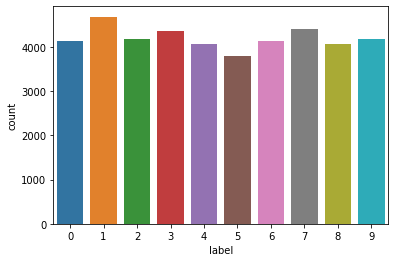

In [13]:
Y_train = X['label']
X_train = X.drop(labels = ['label'],axis = 1)

sns.countplot(Y_train)

In [14]:
#missing data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [17]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [20]:
#normalize

X_train = X_train / 255.0
test = test / 255.0

In [21]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [22]:
#encode the set**
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

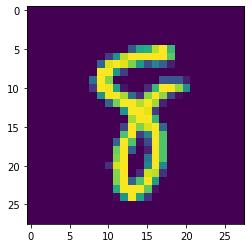

In [30]:
#show
plt.imshow(X_train[0][:,:,0])

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [32]:
classifier = Sequential()

classifier.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
classifier.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))


classifier.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
classifier.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
classifier.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
classifier.add(Dropout(0.25))


classifier.add(Flatten())
classifier.add(Dense(256, activation = "relu"))
classifier.add(Dropout(0.5))
classifier.add(Dense(10, activation = "softmax"))

In [33]:
classifier.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [35]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [36]:
classifier.fit_generator(datagen.flow(X_train,Y_train, batch_size=86),
                              epochs = 30, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // 86)

Epoch 1/30
 - 9s - loss: 0.5022 - accuracy: 0.8389 - val_loss: 0.0964 - val_accuracy: 0.9713
Epoch 2/30
 - 4s - loss: 0.1588 - accuracy: 0.9530 - val_loss: 0.0614 - val_accuracy: 0.9820
Epoch 3/30
 - 4s - loss: 0.1161 - accuracy: 0.9660 - val_loss: 0.0723 - val_accuracy: 0.9798
Epoch 4/30
 - 4s - loss: 0.0999 - accuracy: 0.9712 - val_loss: 0.0670 - val_accuracy: 0.9791
Epoch 5/30
 - 4s - loss: 0.0857 - accuracy: 0.9743 - val_loss: 0.0432 - val_accuracy: 0.9866
Epoch 6/30
 - 4s - loss: 0.0784 - accuracy: 0.9769 - val_loss: 0.0522 - val_accuracy: 0.9876
Epoch 7/30
 - 4s - loss: 0.0705 - accuracy: 0.9789 - val_loss: 0.0443 - val_accuracy: 0.9889
Epoch 8/30
 - 4s - loss: 0.0632 - accuracy: 0.9806 - val_loss: 0.0442 - val_accuracy: 0.9895
Epoch 9/30
 - 4s - loss: 0.0595 - accuracy: 0.9823 - val_loss: 0.0457 - val_accuracy: 0.9876
Epoch 10/30
 - 4s - loss: 0.0586 - accuracy: 0.9819 - val_loss: 0.0380 - val_accuracy: 0.9889
Epoch 11/30
 - 4s - loss: 0.0545 - accuracy: 0.9837 - val_loss: 0.037

In [37]:
classifier.save("d1.h5")